In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings(action='ignore')

In [146]:
avocado=pd.read_csv('avocado.csv')

In [147]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [148]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [149]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [150]:
avocado.shape

(18249, 14)

In [151]:
#finding null values
avocado.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [152]:
#finding duplicated data
avocado.duplicated().sum()

0

In [153]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [154]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [155]:
avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [156]:
avocado['Total Volume'].value_counts()

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64

In [157]:
avocado['Total Bags'].value_counts()

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64

In [158]:
avocado['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [159]:
#dropping the unnecessary columns
avocado=avocado.drop(columns='Total Bags',axis=1)
avocado=avocado.drop(columns='Small Bags',axis=1)
avocado=avocado.drop(columns='Large Bags',axis=1)
avocado=avocado.drop(columns='Unnamed: 0',axis=1)
avocado=avocado.drop(columns='Date',axis=1)
avocado=avocado.drop(columns='XLarge Bags',axis=1)

In [160]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [161]:
avocado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [162]:
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
avocado['region']=a.fit_transform(avocado['region'])


In [163]:
avocado.replace({'type':{'conventional':0,'organic':1}},inplace=True)

In [164]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.000000,2018.000000,53.000000


In [165]:
avocado.mean()

AveragePrice         1.405978
Total Volume    850644.013009
4046            293008.424531
4225            295154.568356
4770             22839.735993
type                 0.499918
year              2016.147899
region              26.495644
dtype: float64

In [166]:
avocado['AveragePrice'].mean()

1.405978409775878

In [167]:
avocado['Total Volume'].mean()

850644.0130089321

# Finding Skewness

In [168]:
avocado.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [169]:
from scipy.stats import zscore
z=np.abs(zscore(avocado))
z

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.999836,1.221282,1.700252
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.999836,1.221282,1.700252
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.999836,1.221282,1.700252
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.999836,1.221282,1.700252
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,1.000164,1.970504,1.700811
18245,0.755023,0.242296,0.230693,0.242277,0.212540,1.000164,1.970504,1.700811
18246,1.152375,0.242331,0.230693,0.243090,0.205766,1.000164,1.970504,1.700811
18247,1.301382,0.241625,0.230428,0.242651,0.205774,1.000164,1.970504,1.700811


In [170]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [171]:
avocado_new=avocado[(z<3).all(axis=1)]

In [172]:
avocado.shape

(18249, 8)

In [173]:
avocado_new.shape

(17838, 8)

In [174]:
avocado=avocado_new
avocado.shape

(17838, 8)

In [175]:
avocado.skew()

AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
type           -0.016371
year            0.221195
region          0.012062
dtype: float64

# Correlation

In [176]:
avocado.corr()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
AveragePrice,1.000000,-0.335993,-0.341108,-0.258327,-0.251435,0.615877,0.083923,-0.012867
Total Volume,-0.335993,1.000000,0.895711,0.872944,0.665394,-0.408758,0.035491,0.104098
4046,-0.341108,0.895711,1.000000,0.609011,0.521171,-0.347610,0.004418,0.140508
4225,-0.258327,0.872944,0.609011,1.000000,0.646344,-0.390565,-0.011895,0.028600
4770,-0.251435,0.665394,0.521171,0.646344,1.000000,-0.329346,-0.054362,-0.077535
type,0.615877,-0.408758,-0.347610,-0.390565,-0.329346,1.000000,-0.004302,0.010912
year,0.083923,0.035491,0.004418,-0.011895,-0.054362,-0.004302,1.000000,-0.001074
region,-0.012867,0.104098,0.140508,0.028600,-0.077535,0.010912,-0.001074,1.000000


In [178]:
x=avocado.drop(columns=['AveragePrice'],axis=1)
print(x)

       Total Volume     4046       4225    4770  type  year  region
0          64236.62  1036.74   54454.85   48.16     0  2015       0
1          54876.98   674.28   44638.81   58.33     0  2015       0
2         118220.22   794.70  109149.67  130.50     0  2015       0
3          78992.15  1132.00   71976.41   72.58     0  2015       0
4          51039.60   941.48   43838.39   75.78     0  2015       0
...             ...      ...        ...     ...   ...   ...     ...
18244      17074.83  2046.96    1529.20    0.00     1  2018      53
18245      13888.04  1191.70    3431.50    0.00     1  2018      53
18246      13766.76  1191.92    2452.79  727.94     1  2018      53
18247      16205.22  1527.63    2981.04  727.01     1  2018      53
18248      17489.58  2894.77    2356.13  224.53     1  2018      53

[17838 rows x 7 columns]


In [180]:
y=avocado['AveragePrice']
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17838, dtype: float64


# Data Visualization

<Figure size 800x700 with 0 Axes>

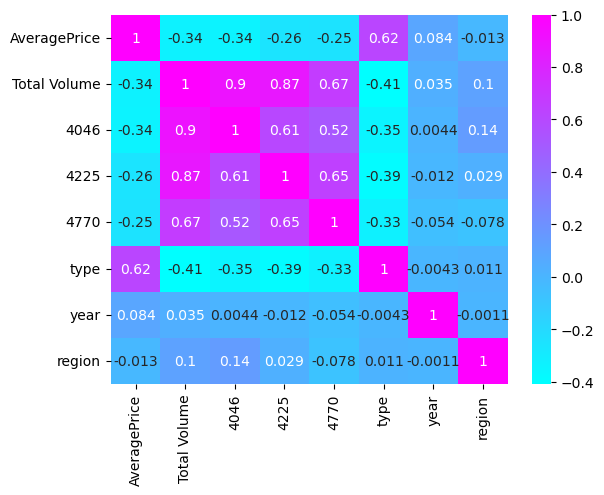

<Figure size 800x700 with 0 Axes>

In [181]:
corr_hmap = avocado.corr()
sns.heatmap(corr_hmap,annot=True,cmap='cool')
plt.figure(figsize=(8,7))

# Univariate Analysis

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

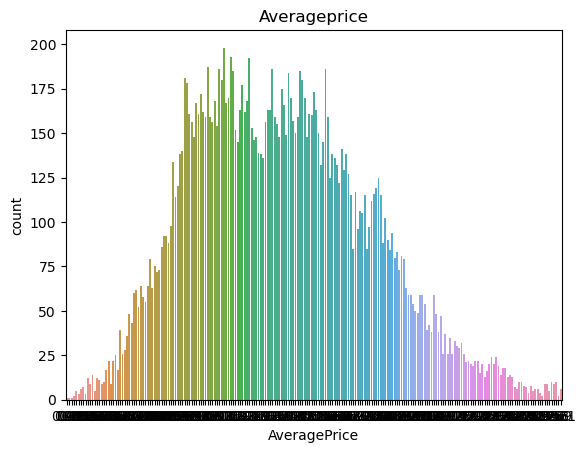

In [182]:
sns.countplot(x ='AveragePrice', data = avocado)
plt.title('Averageprice')
plt.show

# DistPlot

<function matplotlib.pyplot.show(close=None, block=None)>

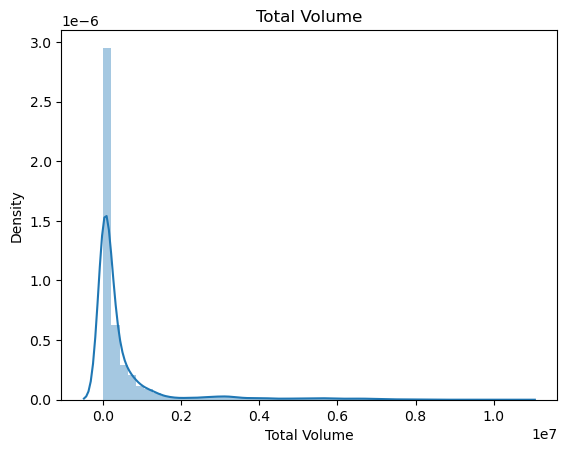

In [204]:
sns.distplot(avocado['Total Volume'])
plt.title('Total Volume')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

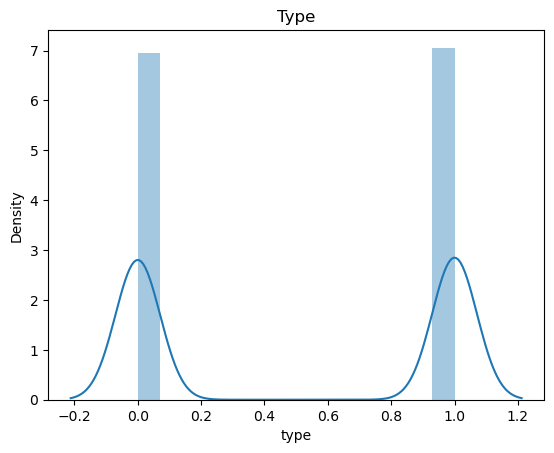

In [205]:
sns.distplot(avocado['type'])
plt.title('Type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

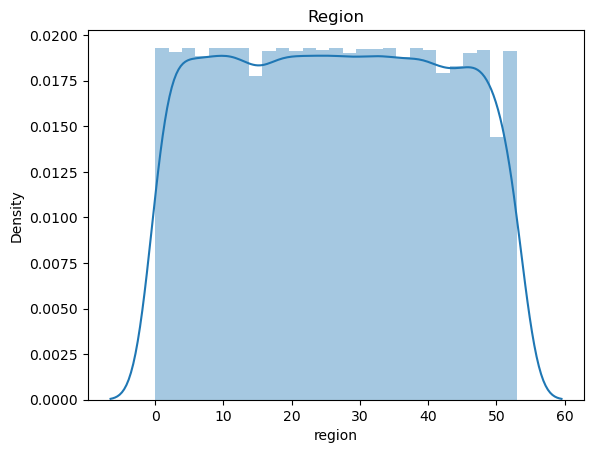

In [206]:
sns.distplot(avocado['region'])
plt.title('Region')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

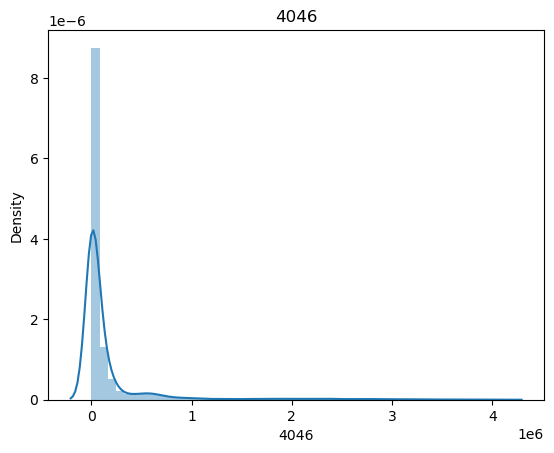

In [207]:
sns.distplot(avocado['4046'])
plt.title('4046')
plt.show

# KDE Plot

<Axes: xlabel='region', ylabel='Density'>

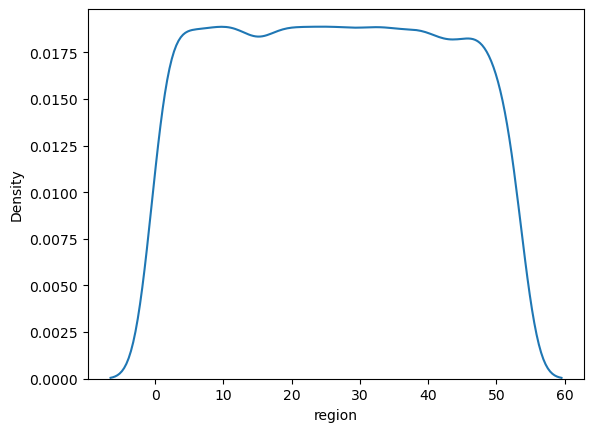

In [358]:
sns.kdeplot(data = avocado.region)

<Axes: xlabel='type', ylabel='Density'>

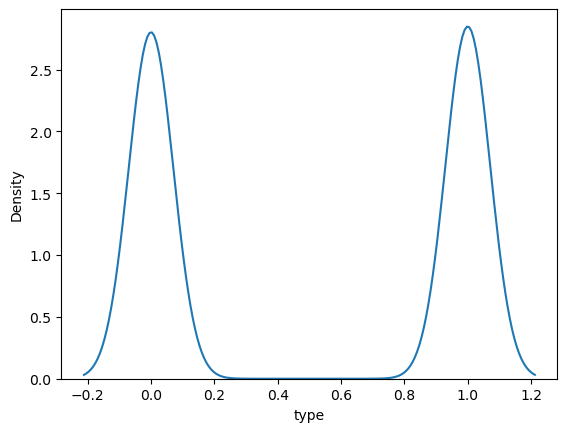

In [359]:
sns.kdeplot(data = avocado.type)

# Bivariate Analysis

# BarPlot

<Axes: xlabel='AveragePrice', ylabel='region'>

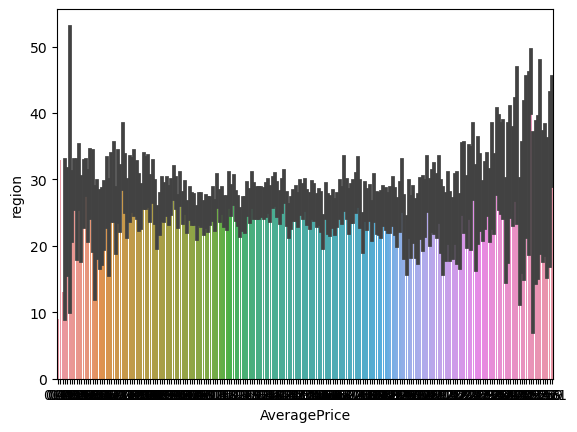

In [362]:
sns.barplot(x='AveragePrice',y='region',data=avocado)

<Axes: xlabel='region', ylabel='type'>

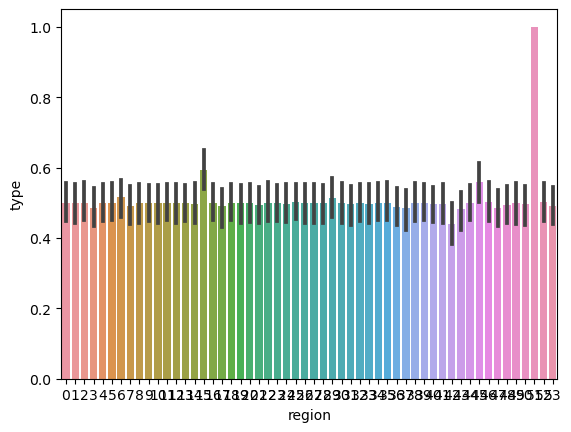

In [363]:
sns.barplot(x='region',y='type',data=avocado)

<Axes: xlabel='4046', ylabel='type'>

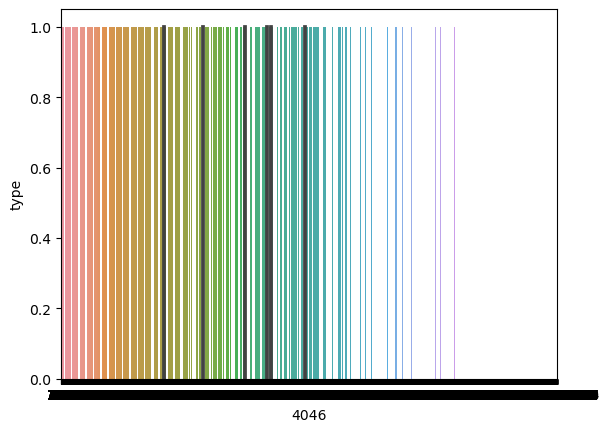

In [364]:
sns.barplot(x='4046',y='type',data=avocado)

<Axes: xlabel='AveragePrice', ylabel='year'>

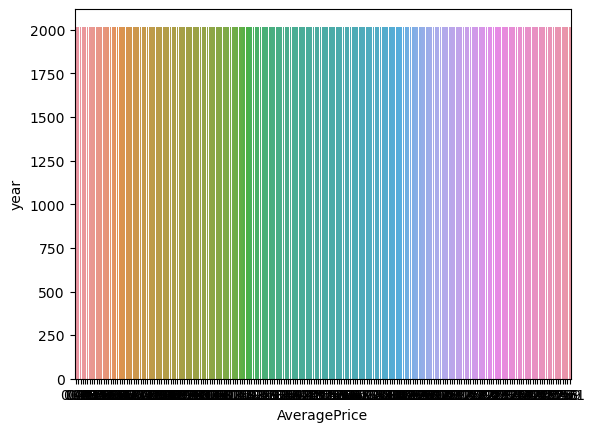

In [365]:
sns.barplot(x='AveragePrice',y='year',data=avocado)

# Histogram

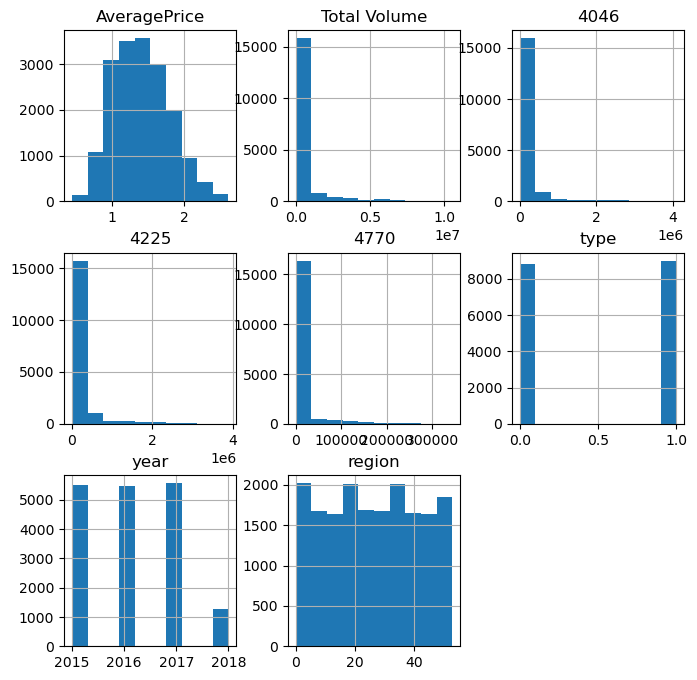

In [186]:
avocado.hist(figsize=(8,8),bins=10)
plt.show()

# PairPlot

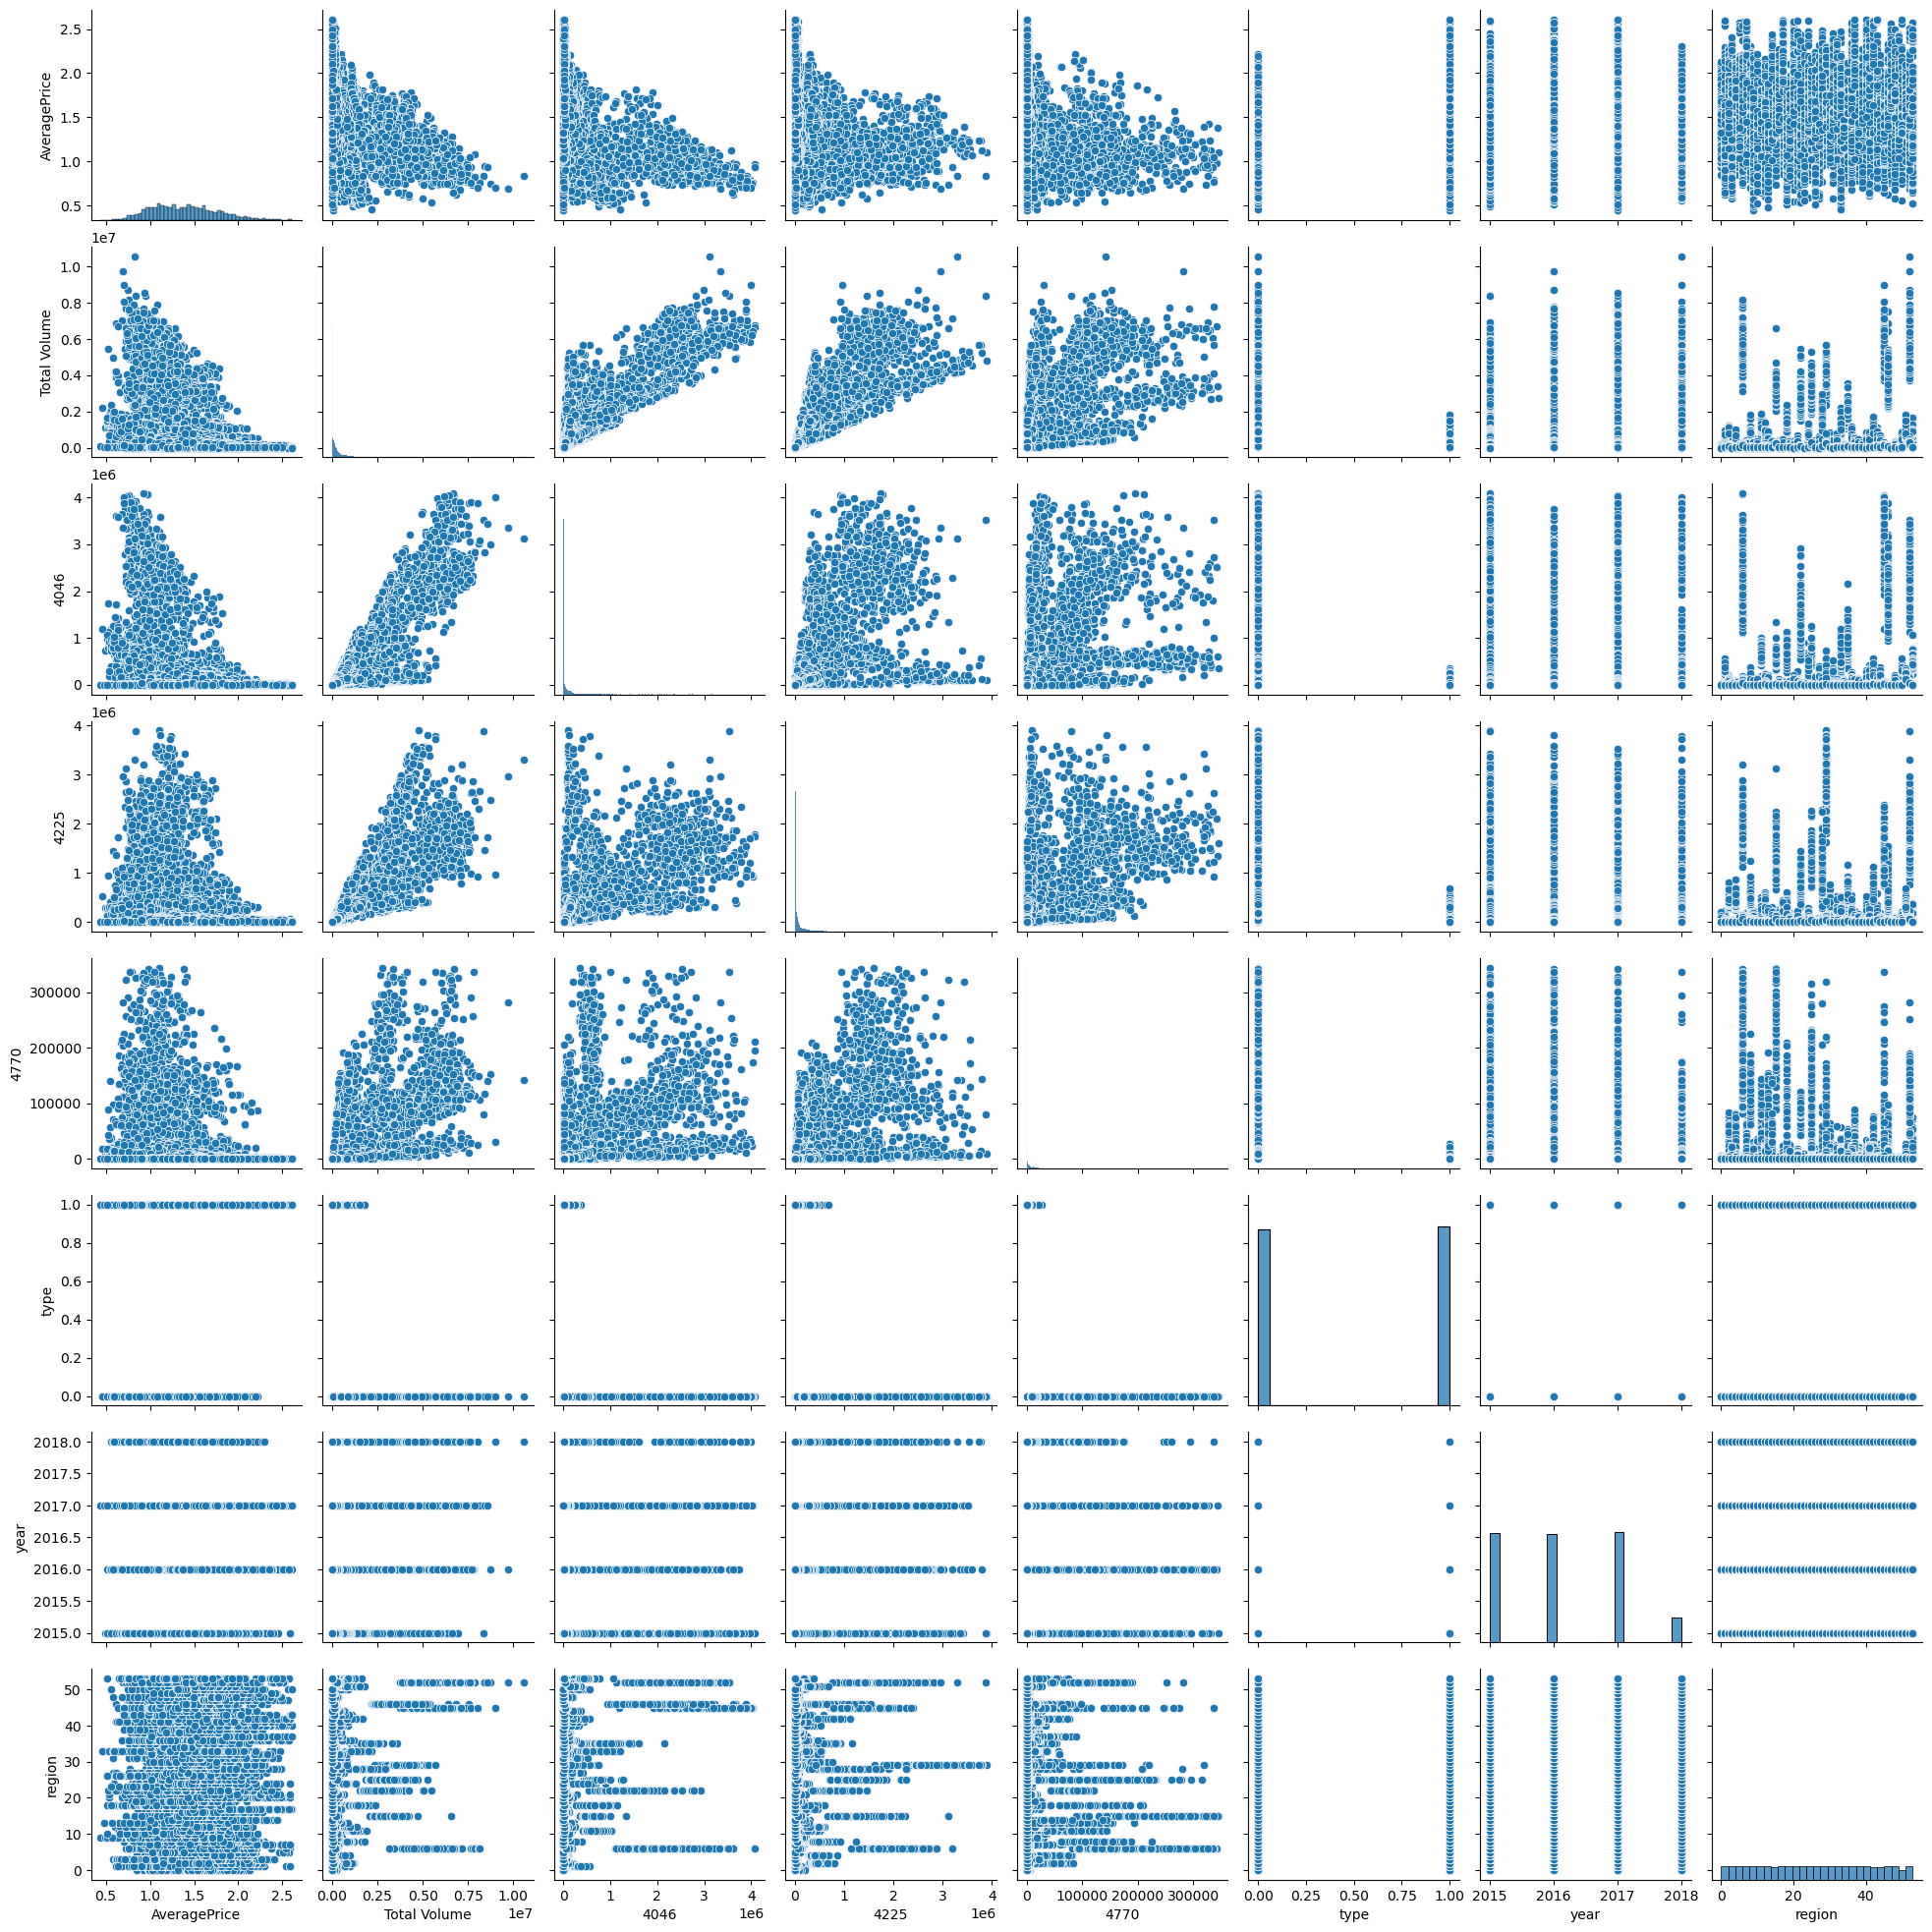

In [187]:
sns.pairplot(avocado)

# SCatter Plot

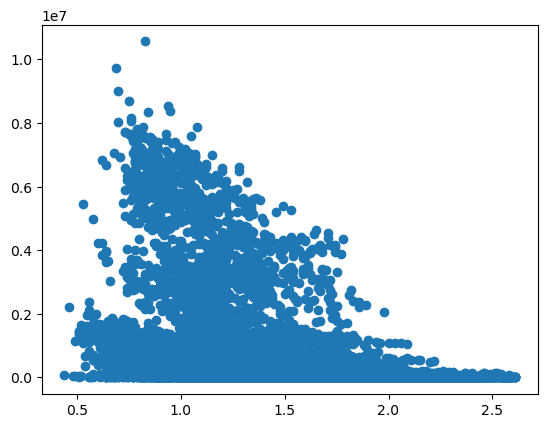

In [190]:
plt.scatter(avocado['AveragePrice'],avocado['Total Volume'])
plt.show()

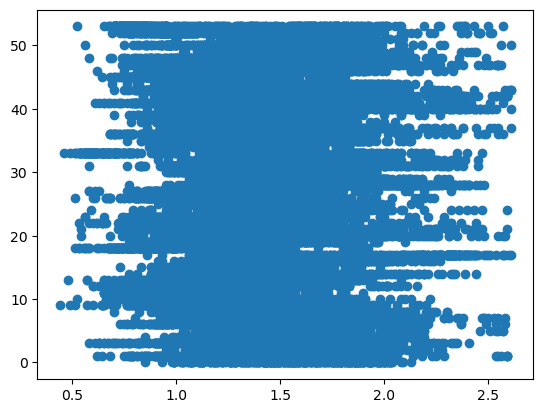

In [191]:
plt.scatter(avocado['AveragePrice'],avocado['region'])
plt.show()

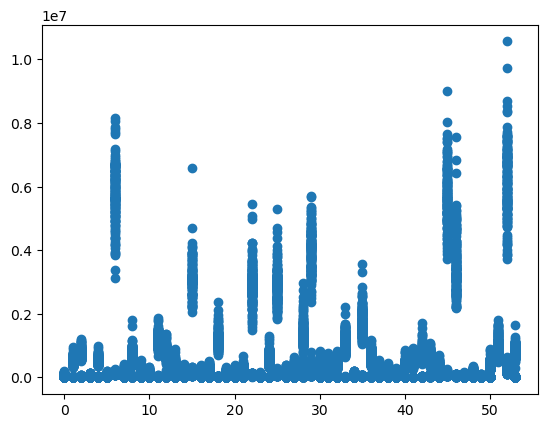

In [193]:
plt.scatter(avocado['region'],avocado['Total Volume'])
plt.show()

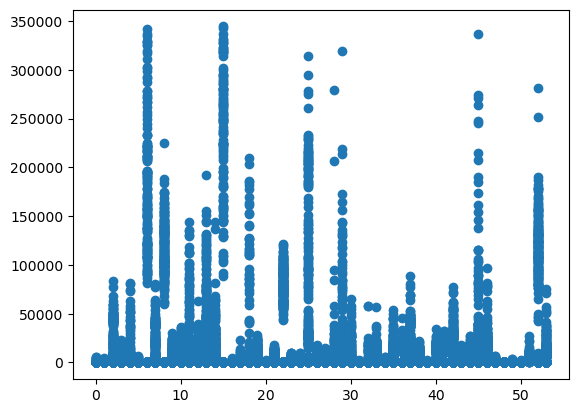

In [194]:
plt.scatter(avocado['region'],avocado['4770'])
plt.show()

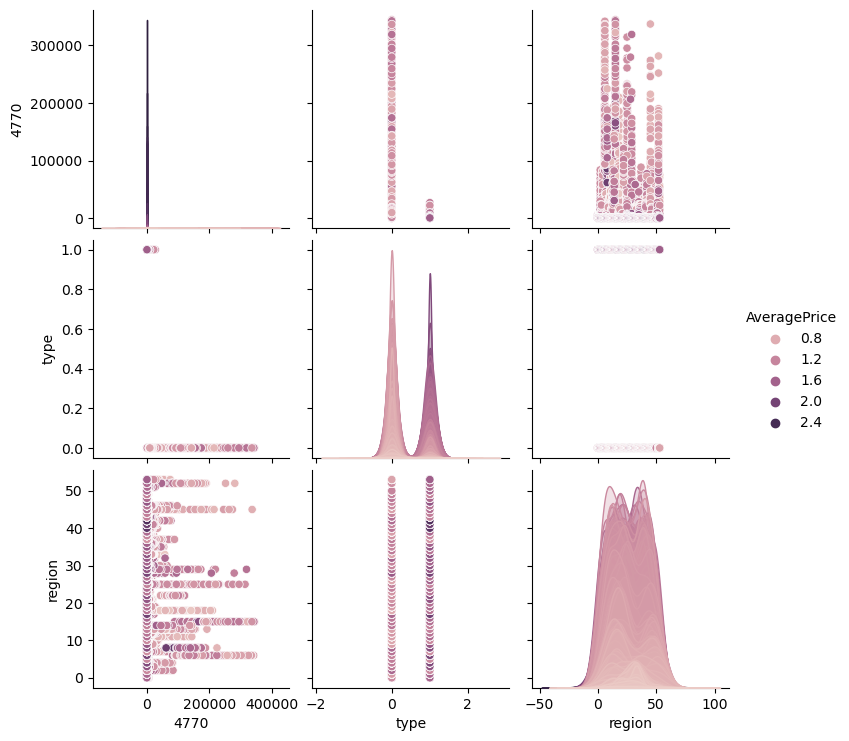

In [196]:
sns.pairplot(data=avocado,hue='AveragePrice',vars=['4770','type','region'])

# JointPlot

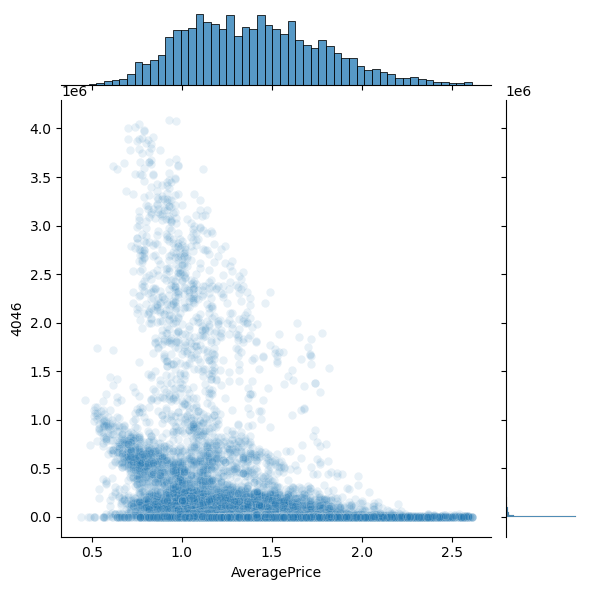

In [197]:
from scipy.stats import pearsonr
sns.jointplot(x='AveragePrice', y='4046', data=avocado, alpha = 0.1)

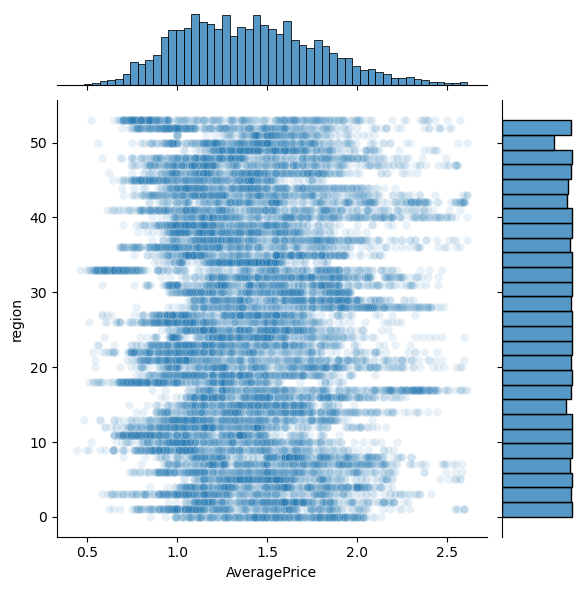

In [199]:
from scipy.stats import pearsonr
sns.jointplot(x='AveragePrice', y='region', data=avocado, alpha = 0.1)

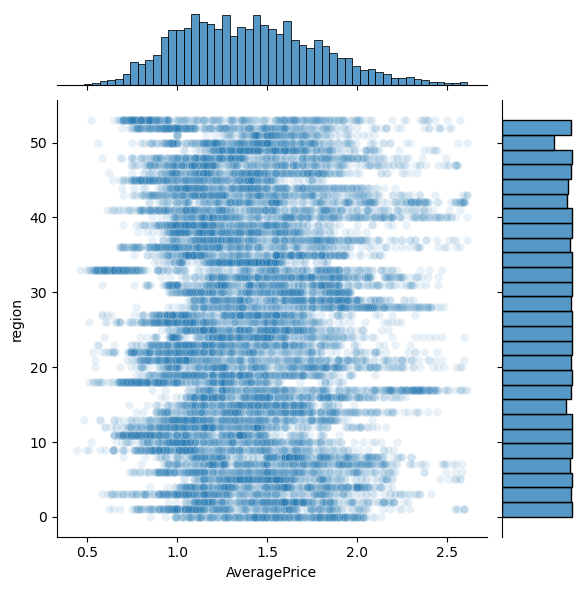

In [200]:

sns.jointplot(x='AveragePrice', y='region', data=avocado, alpha = 0.1)

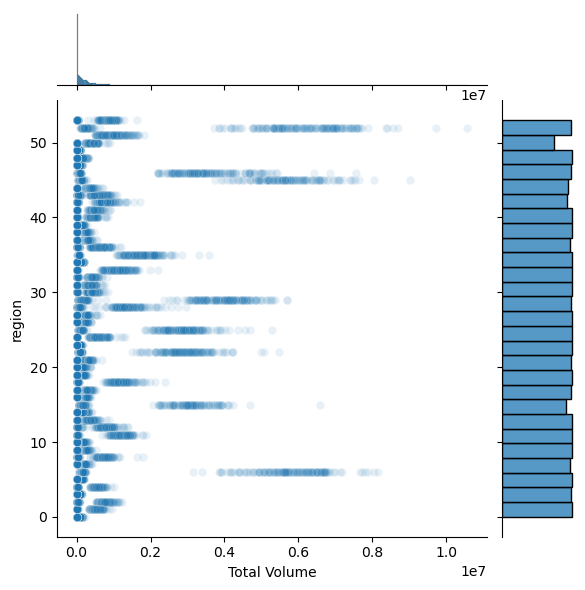

In [203]:

sns.jointplot(x='Total Volume', y='region', data=avocado, alpha = 0.1)

# Training The Model

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [215]:
x_train.shape

(12486, 7)

In [216]:
y_train.shape

(12486,)

In [217]:
x_test.shape

(5352, 7)

In [218]:
y_train.shape

(12486,)

In [348]:
y_test.shape

(5352,)

In [219]:
lm=LinearRegression()

In [220]:
lm.fit(x_train,y_train)

LinearRegression()

In [221]:
lm.coef_

array([-5.59501048e-08, -7.79310522e-08,  1.66057614e-07, -9.86139138e-08,
        4.47759865e-01,  3.68877162e-02,  1.77060064e-04])

In [222]:
lm.intercept_

-73.18659690457078

In [223]:
lm.score(x_train,y_train)

0.4114846707575235

In [224]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [1.20498351 1.59248595 1.1446355  ... 1.17502279 1.70742655 0.81913136]
actual price: 3719     1.50
9815     1.71
290      1.40
15456    1.44
11468    1.43
         ... 
13509    1.58
1100     0.99
8426     0.93
18116    2.30
8054     1.08
Name: AveragePrice, Length: 5352, dtype: float64


In [225]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.23363047237361134
Mean squared error: 0.08945742996555647
Root mean squared error: 0.29909434960486375


In [226]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.40921618088968126


In [227]:
knn=KNeighborsRegressor()

In [228]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [229]:
predknn=knn.predict(x_test)

In [248]:
knn.score(x_train,y_train)

0.696453208264808

In [249]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 0.23363047237361134
Mean squared error: 0.08945742996555647
r2 score 0.5544260112183568


In [233]:
svm=SVR()

In [234]:
svm.fit(x_train,y_train)

SVR()

In [237]:
predsvm=svm.predict(x_test)

In [251]:
svm.score(x_train,y_train)

0.3984930432773358

In [252]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 0.23363047237361134
Mean squared error: 0.08945742996555647
r2 score 0.3976476676372108


In [240]:
dtc=DecisionTreeRegressor()

In [241]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [242]:
preddtc=dtc.predict(x_test)

In [ ]:
dtc.score(x_train,y_train)

In [253]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 0.23363047237361134
Mean squared error: 0.08945742996555647
r2 score 0.6722130441270997


In [244]:
rfc=RandomForestRegressor()

In [245]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [246]:
predrfc=rfc.predict(x_test)

In [254]:
rfc.score(x_train,y_train)

0.9748164910722755

In [255]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 0.23363047237361134
Mean squared error: 0.08945742996555647
r2 score 0.8378360502038384


In [256]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [257]:
#testing the model
pred=lasso.predict(x_test)

In [258]:
lasso.score(x_train,y_train)

0.12672281042861866

In [259]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,pred)))

error:
Mean absolute error: 0.2980158967385098
Mean squared error: 0.1331814014256153
r2 score 0.12045967563584226


# K Fold Validation 

In [269]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [270]:
print('The Best score for Linear Model is',score.mean())

The Best score for Linear Model is 0.41039932059053735


In [271]:

k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best score Decision Tree REgressor is',score.mean())

The Best score Decision Tree REgressor is 0.620217565781195


In [275]:

k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best score Random Forest REgressor is',score.mean())

The Best score Random Forest REgressor is 0.8073780658510596


In [276]:

k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)
print('The Best score K neighbour Regressor is',score.mean())

The Best score K neighbour Regressor is 0.5332351749712313


In [277]:

k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)
print('The Best score Lasso is',score.mean())

The Best score Lasso is 0.1253438547427593


In [281]:

k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)
print('The Best score SVM is',score.mean())

The Best score SVM is 0.3944607521330454


# Randomized Search Cv

In [321]:
#estimating the parameters
param_grid={'n_estimators':[20,30],'max_features':['auto','sqrt'],'min_samples_split':[3,6],'min_samples_leaf':[7,9],'bootstrap':[True,False]}
           


# Hypertuning the best model

In [322]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=50,verbose=1,cv=5,random_state=42,n_jobs=2)

In [332]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [7, 9],
                                        'min_samples_split': [3, 6],
                                        'n_estimators': [20, 30]})

In [333]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'auto', 'bootstrap': True}
Best Score 0.7673474756200097


In [338]:
r_fit=RandomForestRegressor(n_estimators= 20, min_samples_split= 3, min_samples_leaf= 7, max_features='auto', bootstrap=True)

In [339]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=7,
                      min_samples_split=3, n_estimators=20)

In [352]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [353]:
df

,Actual Data,predicted Data
3719,1.50,1.221003
9815,1.71,1.702874
290,1.40,1.386698
15456,1.44,1.616668
11468,1.43,1.460170
...,...,...
13509,1.58,1.609830
1100,0.99,1.016571
8426,0.93,0.912693
18116,2.30,2.095729


In [2]:
#Random Forest Regressor is the best model to predict the data